#The Sparks Foundation

**Data Science And Business Analytics Internship November 2021**

**Anjali Kolekar**

*gripnovember2021*


# Predication using Supervised ML - Task 1

## Predication on percentage of students

First importing numpy,scipy and matplotlib

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

first we Load dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df
print("Data imported")
df.head()

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We need to check whether any null values present in dataset.


In [4]:
# Describe() is used to describe the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

From above we understand that there is no missing value

Let's now plot graph

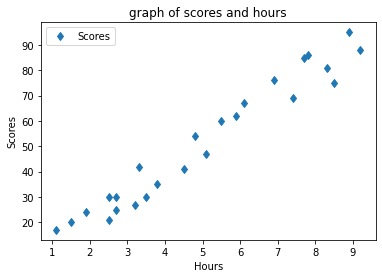

In [6]:
df.plot(x="Hours",y="Scores",style = 'd')
plt.title("graph of scores and hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

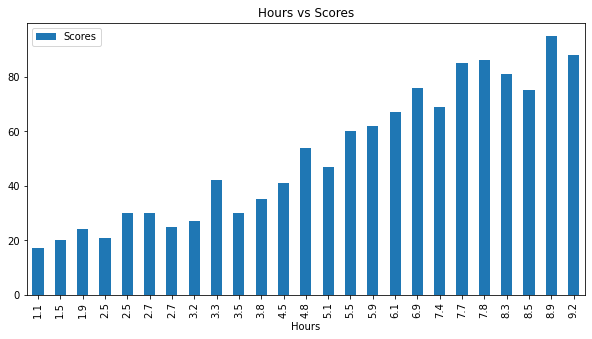

In [7]:
pd.DataFrame(df, columns = ['Hours','Scores']).sort_values(by = 'Hours', ascending = True).plot.bar(x = 'Hours', y = 'Scores',figsize = (10,5),title = "Hours vs Scores")

As seen in graph, number of scores are increases as number of hours increases, which indicate there is positive correlated.





Now we prepare data for model



In [8]:
x = df.iloc[:,:-1].values
y= df.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

We divide data for training and testing 

In [10]:
# train the model
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0)

In [11]:
x_train.shape

(17, 1)

In [12]:
x_test.shape

(8, 1)

In [13]:
y_test.shape

(8,)

In [14]:
y_train.shape

(17,)

Once data is divide, next step is to Train the model

In [15]:
from sklearn.linear_model import LinearRegression
#for creating object of LinearRegression
reg = LinearRegression()

#fitting model
reg.fit(x_train, y_train)

LinearRegression()

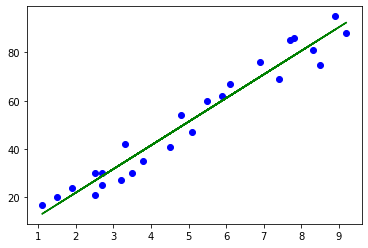

In [16]:
#plotting the regression line
reg_line = reg.coef_ * x + reg.intercept_

#plotting for test data
plt.scatter(x,y,c="b")
plt.plot(x,reg_line,c="g")
plt.show()

In [17]:
#score of training model
reg.score(x_train,y_train)

0.9484997422695115

In [18]:
#score of testing data
reg.score(x_test,y_test)

0.9568211104435257

## Predicating Scores

We now Predicte and then compare result with Actual result by displaying it 

In [19]:
y_pred = reg.predict(x_test)

comp = pd.DataFrame({"Predicated_result":y_test,"Actual_result" : y_pred})
comp

,Predicated_result,Actual_result
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Here Graph is plotted for train and test model

Text(0, 0.5, 'Scores of Students')

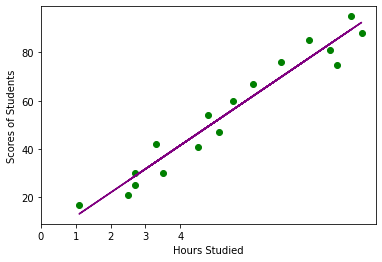

In [20]:
# Graph of Train model
plt.figure()
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, reg.predict(x_train), color = 'purple')
plt.xticks(range(0,5))
plt.xlabel('Hours Studied')
plt.ylabel('Scores of Students')

Text(0, 0.5, 'Scores of Students')

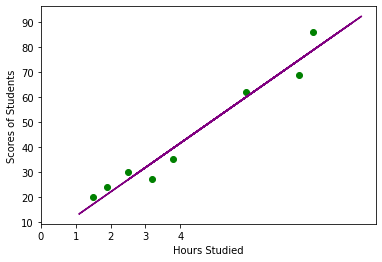

In [21]:
# Graph of Test Model
plt.figure()
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, reg.predict(x_train), color = 'purple')
plt.xticks(range(0,5))
plt.xlabel('Hours Studied')
plt.ylabel('Scores of Students')

Let's Predicte the scores if student study for 9.25 hours

In [22]:
hours = 9.25

pred = reg.predict([[hours]])
print(float(pred))

92.91505723477056


Evaluating the model

In [23]:
from sklearn import metrics 

#mean abolute error
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)

print("Mean Absolute Error : ",mean_abs_error)

Mean Absolute Error :  4.419727808027651


## Thank you